# 새로운 인사이트 발견하기

### (1) 새로운 값 계산하기

In [25]:
%matplotlib inline
import pandas as pd

In [4]:
df = pd.read_csv('data/broadcast.csv',index_col=0 )

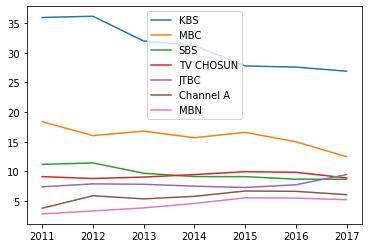

In [5]:
df.plot()

In [7]:
df['KBS']+df['MBC']+df['SBS']+df["TV CHOSUN"] + df['JTBC'] + df['Channel A'] + df['MBN']

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [9]:
df.sum(axis='columns')

2011    88.560
2012    89.440
2013    84.451
2014    83.259
2015    82.854
2016    80.891
2017    77.626
dtype: float64

In [11]:
df['total'] = df.sum(axis='columns')
df

,KBS,MBC,SBS,TV CHOSUN,JTBC,Channel A,MBN,total
2011,35.951,18.374,11.173,9.102,7.380,3.771,2.809,177.120
2012,36.163,16.022,11.408,8.785,7.878,5.874,3.310,178.880
2013,31.989,16.778,9.673,9.026,7.810,5.350,3.825,168.902
2014,31.210,15.663,9.108,9.440,7.490,5.776,4.572,166.518
2015,27.777,16.573,9.099,9.940,7.267,6.678,5.520,165.708
2016,27.583,14.982,8.669,9.829,7.727,6.624,5.477,161.782
2017,26.890,12.465,8.661,8.886,9.453,6.056,5.215,155.252


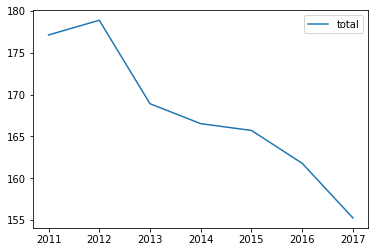

In [12]:
df.plot(y='total')

In [13]:
# 떨어지고 있구나!

In [22]:
# 지상파만!
df['Group1'] = df.loc[:,'KBS':'SBS'].sum(axis='columns')

In [23]:
# 공중파만!
df['Group2'] = df.loc[:,'TV CHOSUN':'MBN'].sum(axis='columns')


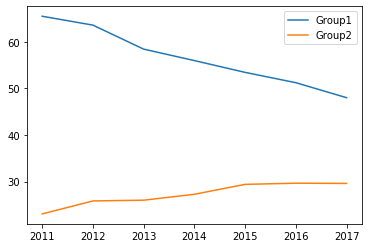

In [24]:
df.plot(y=['Group1','Group2'])

In [26]:
# 지상파는 인기가 내려가고 공중파가 올라가고 있구나!

### (2) 문자열 필터링

In [29]:
df = pd.read_csv('data/albums.csv')
df['Genre'].unique()

array(['Rock', 'Rock, Pop', 'Funk / Soul', 'Rock, Blues', 'Jazz',
       'Jazz, Rock, Blues, Folk, World, & Country', 'Funk / Soul, Pop',
       'Blues', 'Pop', 'Rock, Folk, World, & Country',
       'Folk, World, & Country', 'Classical, Stage & Screen', 'Reggae',
       'Hip Hop', 'Jazz, Funk / Soul', 'Rock, Funk / Soul, Pop',
       'Electronic, Rock',
       'Jazz, Rock, Funk / Soul, Folk, World, & Country',
       'Jazz, Rock, Funk / Soul, Pop, Folk, World, & Country',
       'Funk / Soul, Stage & Screen',
       'Electronic, Rock, Funk / Soul, Stage & Screen',
       'Rock, Funk / Soul', 'Rock, Reggae', 'Jazz, Pop',
       'Funk / Soul, Folk, World, & Country', 'Latin, Funk / Soul',
       'Funk / Soul, Blues',
       'Reggae,�Pop,�Folk, World, & Country,�Stage & Screen',
       'Electronic,�Stage & Screen', 'Jazz, Rock, Funk / Soul, Blues',
       'Jazz, Rock', 'Rock, Latin, Funk / Soul', 'Electronic, Rock, Pop',
       'Hip Hop, Rock, Funk / Soul', 'Electronic, Pop',
       'Roc

In [39]:
# Blues '관련된' 앨범들만 뽑아내고 싶은데...
df[df['Genre'] == 'Blues']

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [40]:
# 이렇게 하면 Blues만 나온다.. 그럼 어떻게 할까?

In [41]:
df['Genre'].str.contains('Blues')

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498     True
499    False
Name: Genre, Length: 500, dtype: bool

In [43]:
df[df['Genre'].str.contains('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
8,9,1966,Blonde on Blonde,Bob Dylan,"Rock, Blues","Folk Rock, Rhythm & Blues"
14,15,1967,Are You Experienced,The Jimi Hendrix Experience,"Rock, Blues","Blues Rock, Psychedelic Rock"
18,19,1968,Astral Weeks,Van Morrison,"Jazz, Rock, Blues, Folk, World, & Country","Acoustic, Classic Rock, Free Improvisation"
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
48,49,1971,At Fillmore East,The Allman Brothers Band,"Rock, Blues",Blues Rock
49,50,1957,Here's Little Richard,Little Richard,"Rock, Blues","Rock & Roll, Rhythm & Blues"
54,55,1968,Electric Ladyland,The Jimi Hendrix Experience,"Rock, Blues","Electric Blues, Psychedelic Rock"
59,60,1969,Trout Mask Replica,Captain Beefheart & His Magic Band,"Rock, Blues","Dialogue, Field Recording, Avantgarde, Electri..."
101,102,1966,Fresh Cream,Cream,"Rock, Blues","Blues Rock, Electric Blues"
118,119,1960,At Last!,Etta James,"Funk / Soul, Blues","Rhythm & Blues, Soul"


In [44]:
# str.contains 활용했더니 된다! 정렬을 해보자!

In [45]:
# Blues가 앖에 있는 애들만 해보고 싶다?
df[df['Genre'].str.startswith('Blues')]

,Number,Year,Album,Artist,Genre,Subgenre
21,22,1990,The Complete Recordings,Robert Johnson,Blues,Delta Blues
140,141,1965,Live at the Regal,B.B. King,Blues,Chicago Blues
153,154,1958,Moanin' in the Moonlight,Howlin' Wolf,Blues,Chicago Blues
197,198,1967,The Best of Little Walter,Little Walter,Blues,Chicago Blues
237,238,1962,Howlin' Wolf,Howlin' Wolf,Blues,None
277,278,1997,Anthology of American Folk Music,Various,"Blues, Folk, World, & Country","Cajun, Country, Field Recording, Gospel, Delta..."
281,282,1964,Folk Singer,Muddy Waters,Blues,Delta Blues
376,377,1991,The Ultimate Collection: 1948-1990,John Lee Hooker,Blues,"Country Blues, Electric Blues, Chicago Blues, ..."
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [49]:
df['Contains Blues'] = df['Genre'].str.contains('Blues')
df

,Number,Year,Album,Artist,Genre,Subgenre,Contains Blues
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock",False
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock",False
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock",False
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock",False
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock,False
...,...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock,False
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara...",False
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock,False
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues,True


### (5) 문자열 분리

In [50]:
import pandas as pd

In [52]:
df = pd.read_csv('data/parks.csv')
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,전화번호
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438


In [54]:
# 광주만 뽑아내 봅시다!
df['소재지도로명주소'].str.split()

0                 [광주광역시, 북구, 대천로, 86]
1                 [광주광역시, 북구, 삼정로, 36]
2              [광주광역시, 북구, 임방울대로, 877]
3                 [광주광역시, 북구, 일곡로, 55]
4                [광주광역시, 북구, 설죽로, 526]
                     ...              
8117    [충청남도, 홍성군, 홍성읍, 오관리, 472, 일원]
8118     [경상북도, 영양군, 영양읍, 군민회관길, 42-6]
8119    [경상북도, 영양군, 입암면, 신구리, 산27-5번지]
8120      [경상북도, 영양군, 수비면, 발리리, 산48번지]
8121      [경상북도, 영양군, 영양읍, 삼지리, 200번지]
Name: 소재지도로명주소, Length: 8122, dtype: object

In [55]:
df['소재지도로명주소'].str.split(n=1)

0                [광주광역시, 북구 대천로 86]
1                [광주광역시, 북구 삼정로 36]
2             [광주광역시, 북구 임방울대로 877]
3                [광주광역시, 북구 일곡로 55]
4               [광주광역시, 북구 설죽로 526]
                   ...             
8117     [충청남도, 홍성군 홍성읍 오관리 472 일원]
8118     [경상북도, 영양군 영양읍 군민회관길 42-6]
8119    [경상북도, 영양군 입암면 신구리 산27-5번지]
8120      [경상북도, 영양군 수비면 발리리 산48번지]
8121      [경상북도, 영양군 영양읍 삼지리 200번지]
Name: 소재지도로명주소, Length: 8122, dtype: object

In [57]:
address = df['소재지도로명주소'].str.split(n=1,expand=True)

In [58]:
df['관할구역'] = address[0]

In [59]:
df

,관리번호,공원명,공원구분,소재지도로명주소,전화번호,관할구역
0,29170-00001,문화근린공원,근린공원,광주광역시 북구 대천로 86,062-410-6438,광주광역시
1,29170-00002,두암제1근린공원,근린공원,광주광역시 북구 삼정로 36,062-410-6438,광주광역시
2,29170-00003,첨단체육근린공원,근린공원,광주광역시 북구 임방울대로 877,062-410-6438,광주광역시
3,29170-00004,일곡제1근린공원,근린공원,광주광역시 북구 일곡로 55,062-410-6438,광주광역시
4,29170-00005,일곡제2근린공원,근린공원,광주광역시 북구 설죽로 526,062-410-6438,광주광역시
...,...,...,...,...,...,...
8117,44800-00082,홍성읍24호소공원,소공원,충청남도 홍성군 홍성읍 오관리 472 일원,041-630-1268,충청남도
8118,47760-00002,서부공원,근린공원,경상북도 영양군 영양읍 군민회관길 42-6,054-680-6340,경상북도
8119,47760-00003,입암공원,근린공원,경상북도 영양군 입암면 신구리 산27-5번지,054-680-6340,경상북도
8120,47760-00004,수비공원,근린공원,경상북도 영양군 수비면 발리리 산48번지,054-680-6340,경상북도


### (8) 카테고리로 분류

In [60]:
df = pd.read_csv('data/laptops.csv')
df.head()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN


In [61]:
brand_nation = {
    'Dell': 'U.S.',
    'Apple':'U.S.',
    'Acer':'Taiwan',
    'HP':'U.S.',
    'Lenovo':'China',
    'Alienware':'U.S.',
    'Microsoft':'U.S.',
    'Asus':'Taiwan'
}

In [65]:
# 왼쪽의 값들을 오른쪽 값들로 바꿔주는 놈!
df['brand'].map(brand_nation)

0        U.S.
1        U.S.
2        U.S.
3        U.S.
4        U.S.
        ...  
162    Taiwan
163    Taiwan
164    Taiwan
165    Taiwan
166    Taiwan
Name: brand, Length: 167, dtype: object

In [68]:
df['brand_nation'] = df['brand'].map(brand_nation)
df

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments,brand_nation
0,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,NaN,linux,2.50,NaN,U.S.
1,Apple,MacBook Air,8,ssd,128,13.3,55499,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
2,Apple,MacBook Air,8,ssd,256,13.3,71500,intel,i5,1.8,intel,2.0,mac,1.35,NaN,U.S.
3,Apple,MacBook Pro,8,ssd,128,13.3,96890,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
4,Apple,MacBook Pro,8,ssd,256,13.3,112666,intel,i5,2.3,intel,2.0,mac,3.02,NaN,U.S.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Asus,A555LF,8,hdd,1024,15.6,39961,intel,i3 4th gen,1.7,nvidia,2.0,windows,2.30,NaN,Taiwan
163,Asus,X555LA-XX172D,4,hdd,500,15.6,28489,intel,i3 4th gen,1.9,intel,NaN,linux,2.30,NaN,Taiwan
164,Asus,X554LD,2,hdd,500,15.6,29199,intel,i3 4th gen,1.9,intel,1.0,linux,2.30,NaN,Taiwan
165,Asus,X550LAV-XX771D,2,hdd,500,15.6,29990,intel,i3 4th gen,1.7,intel,NaN,linux,2.50,NaN,Taiwan


### (11)  Groupby

In [70]:
nation_groups = df.groupby('brand_nation')
type(nation_groups)

pandas.core.groupby.generic.DataFrameGroupBy

In [80]:
nation_groups.count()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
Taiwan,44,44,44,44,44,44,44,44,44,44,43,14,44,42,9
U.S.,105,105,105,105,105,105,105,105,105,104,102,50,105,100,28


In [81]:
nation_groups.mean()

,ram,hd_size,screen_size,price,clock_speed,graphic_card_size,weight
brand_nation,,,,,,,
China,6.000000,1080.888889,15.300000,47347.777778,2.500000,2.352941,2.461111
Taiwan,6.272727,726.363636,14.970455,53320.409091,2.164545,288.285714,2.242381
U.S.,7.314286,733.257143,14.603429,71541.295238,2.356346,2.980000,2.216500


In [82]:
nation_groups.first()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,300??5IBR,8,hdd,1024,15.6,40990,intel,i5,2.3,amd,2.0,linux,3.2,2.7 customer rating
Taiwan,Acer,Predator Helios 300,16,ssd,1024,15.6,101839,intel,i7,2.8,nvidia,6.0,windows,2.7,Gaming Laptop
U.S.,Dell,Inspiron 15-3567,4,hdd,1024,15.6,40000,intel,i5,2.5,intel,2.0,linux,2.5,Integrated Graphics


In [83]:
nation_groups.last()

,brand,model,ram,hd_type,hd_size,screen_size,price,processor_brand,processor_model,clock_speed,graphic_card_brand,graphic_card_size,os,weight,comments
brand_nation,,,,,,,,,,,,,,,
China,Lenovo,IdeaPad 520-15IKB 80YL00RXIN,8,hdd,1024,15.6,69990,intel,i7,3.5,nvidia,4.0,windows,2.2,"Core i7-7500U 7th Gen processor, Dolby Audio"
Taiwan,Asus,X540LA-XX538T,4,hdd,1024,15.6,30899,intel,i3 5th gen,2.0,intel,1.0,windows,2.3,Integrated Graphics
U.S.,Microsoft,Surface Book CR9-00013,8,ssd,128,13.5,178799,intel,i5,1.8,intel,2.0,windows,1.5,Integrated Graphics


brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

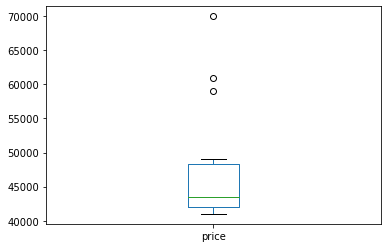

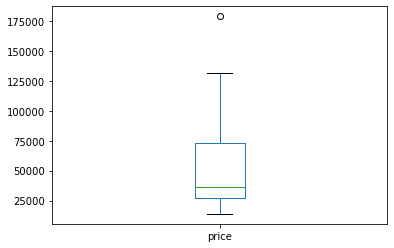

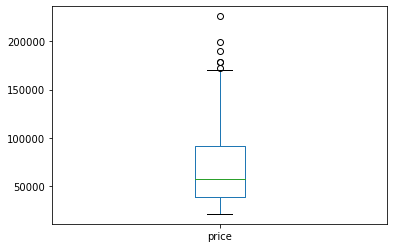

In [84]:
nation_groups.plot(kind='box',y='price')

brand_nation
China     AxesSubplot(0.125,0.125;0.775x0.755)
Taiwan    AxesSubplot(0.125,0.125;0.775x0.755)
U.S.      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

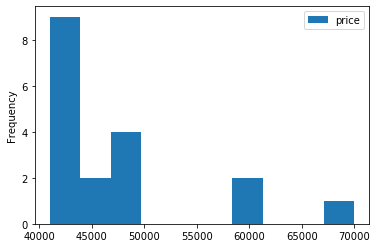

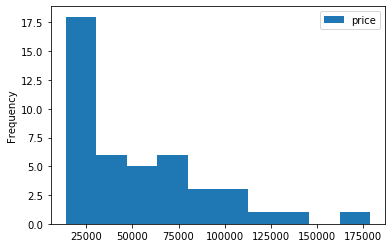

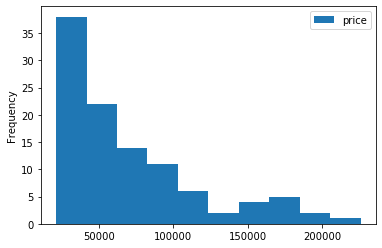

In [85]:
nation_groups.plot(kind='hist',y='price')

### (16) 데이터 합치기

In [86]:
import pandas as pd

In [87]:
price_df = pd.read_csv('data/vegetable_price.csv')
quantity_df = pd.read_csv('data/vegetable_quantity.csv')

In [88]:
price_df

,Product,Price
0,Potato,3000
1,Onion,1600
2,Avocado,5000
3,Garlic,1200
4,Tomato,3500
5,Lettuce,2000
6,Carrot,2500


In [90]:
quantity_df

,Product,Quantity
0,Potato,25
1,Onion,31
2,Avocado,57
3,Pepper,46
4,Broccoli,25
5,Cucumber,9


In [91]:
# 파라미터 : 데이터프레임 x 2 + 겹칠 부분
pd.merge(price_df,quantity_df,on='Product')

,Product,Price,Quantity
0,Potato,3000,25
1,Onion,1600,31
2,Avocado,5000,57


In [92]:
# Inner Join의 결과!

In [93]:
pd.merge(price_df,quantity_df,on='Product',how='left')

,Product,Price,Quantity
0,Potato,3000,25.0
1,Onion,1600,31.0
2,Avocado,5000,57.0
3,Garlic,1200,NaN
4,Tomato,3500,NaN
5,Lettuce,2000,NaN
6,Carrot,2500,NaN


In [94]:
# left join의 결과

In [95]:
pd.merge(price_df,quantity_df,on='Product',how='right')

,Product,Price,Quantity
0,Potato,3000.0,25
1,Onion,1600.0,31
2,Avocado,5000.0,57
3,Pepper,NaN,46
4,Broccoli,NaN,25
5,Cucumber,NaN,9


In [96]:
# right join의 결과

In [98]:
pd.merge(price_df,quantity_df,on='Product',how='outer')

,Product,Price,Quantity
0,Potato,3000.0,25.0
1,Onion,1600.0,31.0
2,Avocado,5000.0,57.0
3,Garlic,1200.0,NaN
4,Tomato,3500.0,NaN
5,Lettuce,2000.0,NaN
6,Carrot,2500.0,NaN
7,Pepper,NaN,46.0
8,Broccoli,NaN,25.0
9,Cucumber,NaN,9.0


In [ ]:
# Full join의 결과!